In [44]:
import pandas as pd
import numpy as np
from taigapy import create_taiga_client_v3
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

In [36]:
correlation_df_all = pd.read_pickle("pydata/tf_dependency_e3ls_expr_correlation_bylineage_dropna.pkl")
tf_filter = pd.read_pickle("pydata/tf_list_by_lineage.pkl")

In [3]:
correlation_df_all

lineage      TF E3_ligase     p-val      corr
0       Ampulla of Vater  TFAP2A     KDM2A  0.709839 -0.157329
1       Ampulla of Vater  TFAP2B     KDM2A  0.588720  0.227030
2       Ampulla of Vater  TFAP2C     KDM2A  0.195091 -0.511497
3       Ampulla of Vater  TFAP2D     KDM2A  0.350621  0.381823
4       Ampulla of Vater  TFAP2E     KDM2A  0.270403 -0.444031
...                  ...     ...       ...       ...       ...
749695      Vulva/Vagina   BMAL2    NEURL1  1.000000 -1.000000
749696      Vulva/Vagina  ZNF875    NEURL1  1.000000 -1.000000
749697      Vulva/Vagina   CBLL2    NEURL1  1.000000  1.000000
749698      Vulva/Vagina    ZUP1    NEURL1  1.000000  1.000000
749699      Vulva/Vagina    TBXT    NEURL1  1.000000 -1.000000

[20203650 rows x 5 columns]

In [4]:
correlation_df_all = correlation_df_all.rename(columns={"lineage": "OncotreeLineage"})

In [5]:
correlation_df_TFfiltered = correlation_df_all[(correlation_df_all["TF"].isin(tf_filter["TF"])) & 
                  (correlation_df_all["OncotreeLineage"].isin(tf_filter["OncotreeLineage"]))]

Biliary Tract


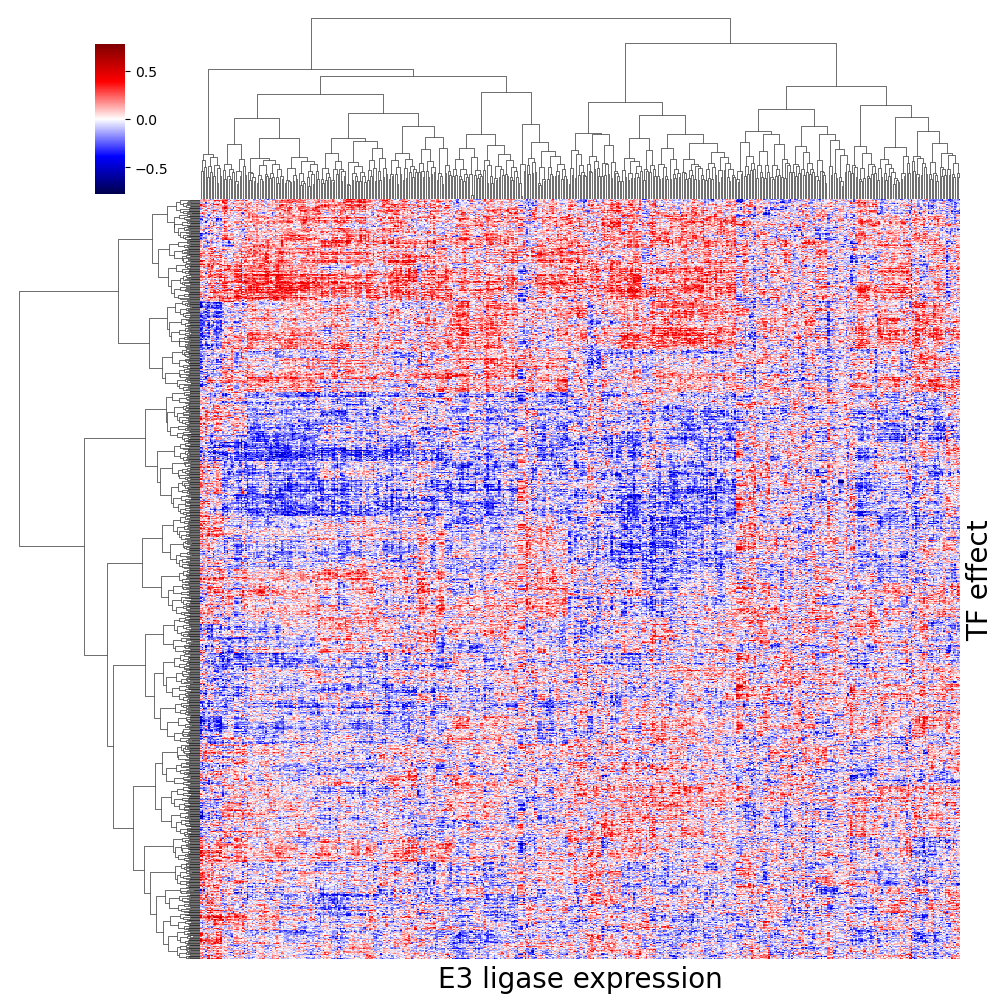

Bladder/Urinary Tract


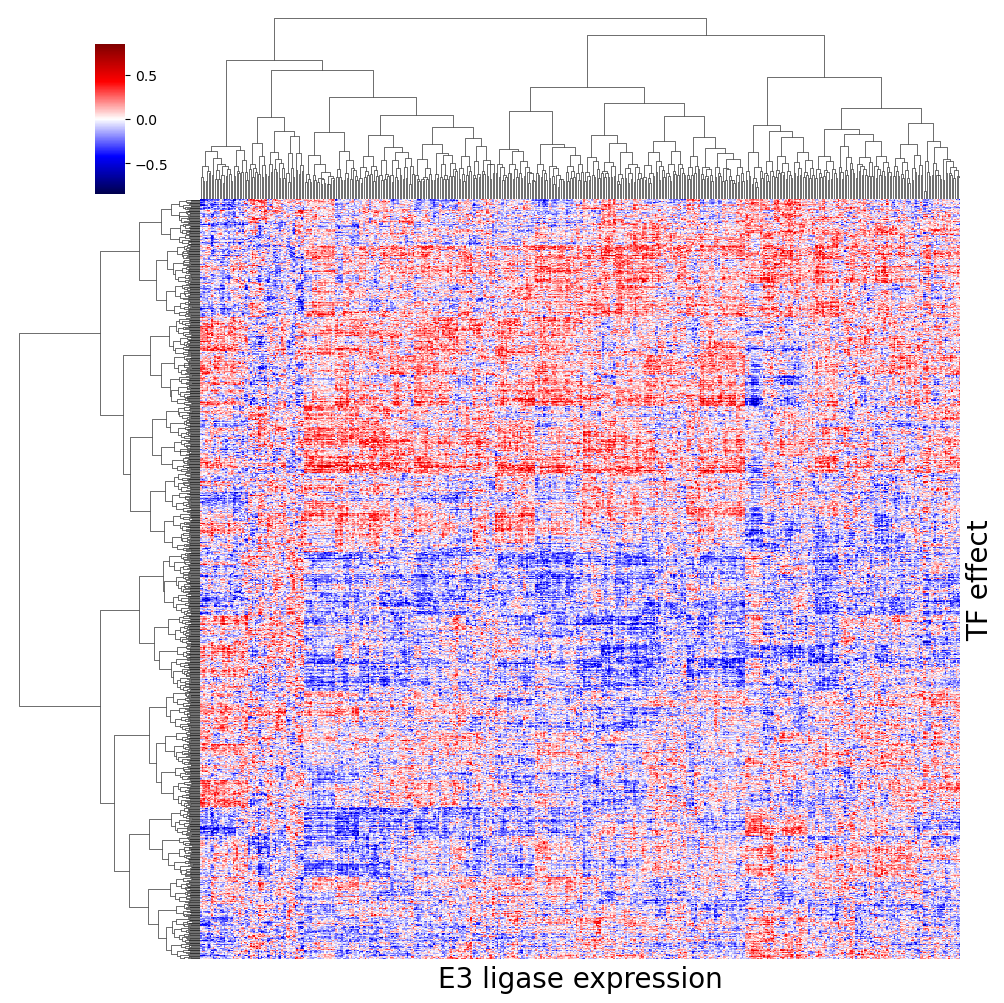

Bone


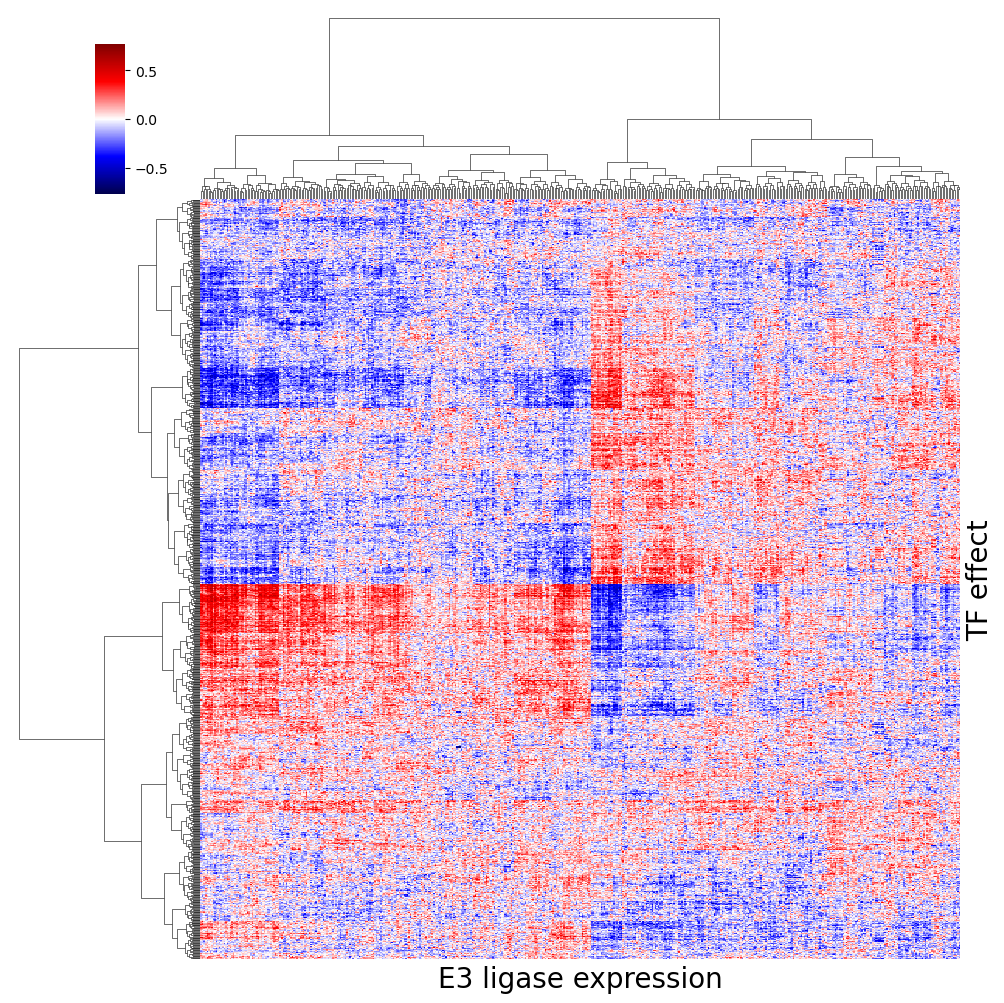

Bowel


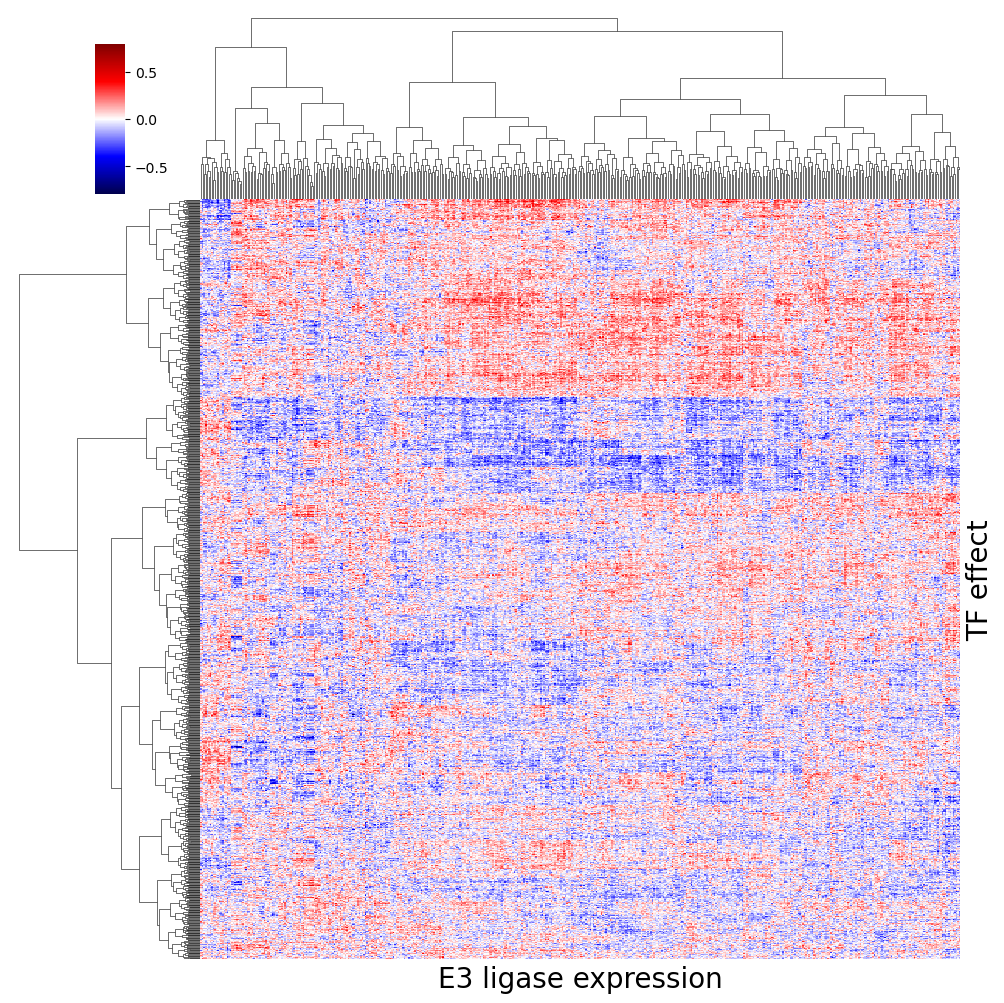

Breast


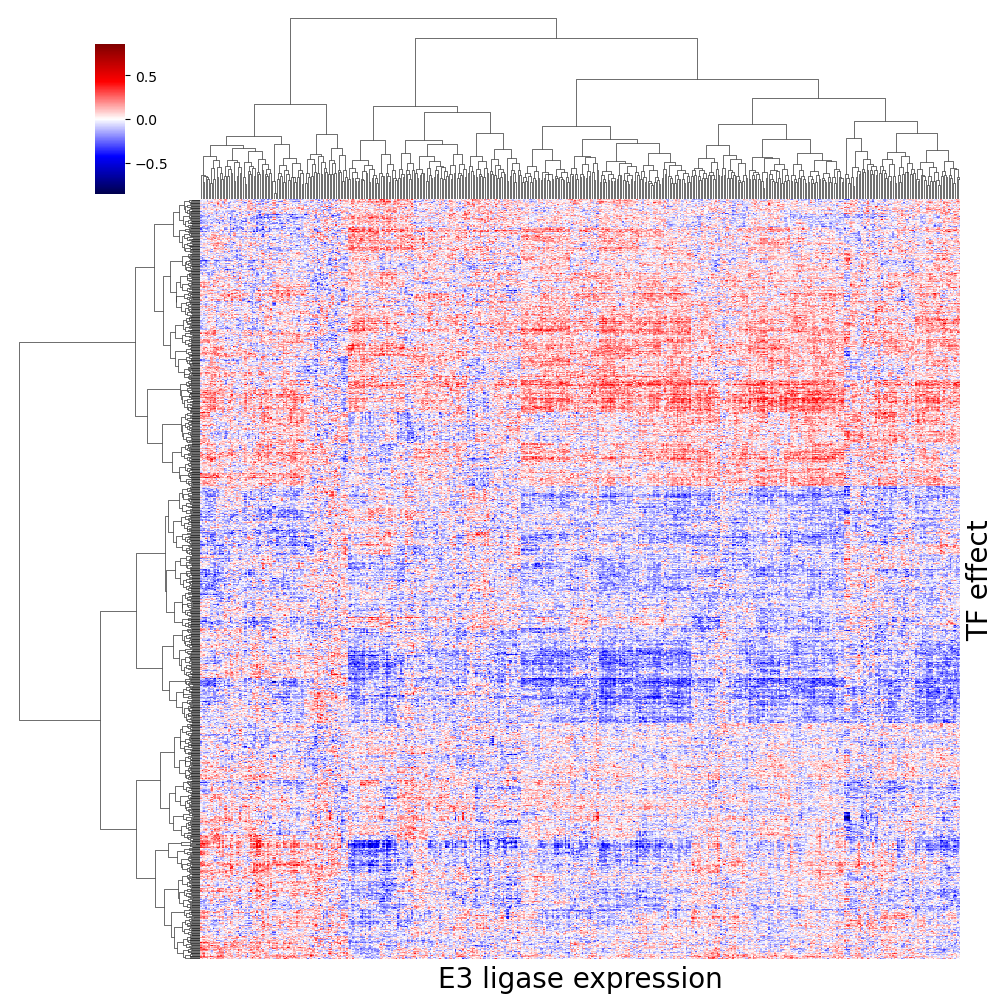

KeyboardInterrupt: 

In [66]:


for lineage in correlation_df_TFfiltered['OncotreeLineage'].unique(): 
    
        l_corr = correlation_df_TFfiltered.loc[correlation_df_TFfiltered['OncotreeLineage'] == lineage,:]
        matrix_l_corr = l_corr.pivot(index='TF', columns='E3_ligase', values='corr')
        
        
        abs_max = max(abs(matrix_l_corr.min().min()), abs(matrix_l_corr.max().max()))
        
        row_linkage = linkage(matrix_l_corr, method='ward')
        col_linkage = linkage(matrix_l_corr.T, method='ward')
    
        
        num_clusters = 3
        
        row_clusters = fcluster(row_linkage, t=num_clusters, criterion='maxclust')
        col_clusters = fcluster(col_linkage, t=num_clusters, criterion='maxclust')


        #Z = linkage(matrix_l_corr, 'ward')
        #dn = dendrogram(Z)
        #linkage_matrix = linkage(matrix_l_corr.fillna(0).T, method='complete', metric='euclidean')
        #dendro = dendrogram(linkage_matrix, truncate_mode='lastp', p=5, no_plot=True)
        
        #num_clusters = 5
        #row_clusters = fcluster(row_linkage, t=num_clusters, criterion='maxclust')
        #col_clusters = fcluster(col_linkage, t=num_clusters, criterion='maxclust')

        #matrix_l_corr['Cluster'] = row_clusters
        #linkage_matrix = linkage(matrix_l_corr.fillna(0), method='complete', metric='euclidean')
        #num_clusters = 5
        #clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')       
        #matrix_l_corr['Cluster'] = clusters
        #matrix_l_corr = matrix_l_corr.sort_values(by='Cluster').drop(columns=['Cluster'])
        
        #hierarchy.leaves_list(Z)

        g = sns.clustermap(matrix_l_corr, 
            xticklabels = False, 
            yticklabels = False, 
            cmap='seismic', 
            vmin = -abs_max,
            vmax = abs_max, 
            cbar_pos=(0.1, 0.8, 0.03, 0.15),
            row_linkage=row_linkage, 
            col_linkage=col_linkage)
            
        
        g.ax_heatmap.set_xlabel('E3 ligase expression', fontsize=20)
        g.ax_heatmap.set_ylabel('TF effect', fontsize=20)
        print(lineage)
        #g.ax_col_dendrogram.set_visible(False)
        #g.ax_row_dendrogram.set_visible(False)
        #g.ax_heatmap.set_title(f'Correlation: TF dependecy - E3 ligase expression in  {lineage}', 
              #fontsize= 15)
        plt.show()

In [52]:
clusters

array([3, 1, 3, ..., 2, 2, 4], dtype=int32)

In [ ]:
matrix_l_corr

KeyError: "None of [Index([3, 1, 3, 3, 4, 4, 2, 1, 1, 4,\n       ...\n       2, 1, 1, 3, 2, 2, 4, 2, 2, 4],\n      dtype='int32', name='E3_ligase', length=1060)] are in the [columns]"